<center><img src="https://pbs.twimg.com/media/FommiJ9WIAEBPI0.jpg" width="500" /></center>
    
 <center> 

# Fase local
## Prediccion - Equipo **Malbecs**

</center>

**Integrantes**

- Denis Trosman
- Vito Stamatti
- Sumit Kumar Jethani Jethani

# Contenido

El presente notebook se estructura de la siguiente manera

1. Preproceso UH_2023_TRAIN.txt 
2. Ingenieria de Variables de UH_2023_TRAIN.txt
3. Preproceso DATOS_ETO.txt
4. Ingenieria de Variablesde DATOS_ETO.txt
5. Ingenieria de Variables de DATOS_METEO.txt
6. Entrenamiento y Validacion
7. Prediccion Final

# 1. Preproceso UH_2023_TRAIN.txt

In [85]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  


from malbecs.preprocess import wine as wine_pr
from malbecs.feateng import wine as wine_fe

seed = 99
raw_wine_path = "../data/raw/UH_2023_TRAIN.txt"
pro_wine_path = "../data/processed/wine_pro.csv" 
final_wine_path = "../data/final/wine_final.csv" 

In [2]:
# carga de datos
wine_data = wine_pr.load_wine_dataset(raw_wine_path)
wine_data.sample(5, random_state=seed)

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
1318,15,68089,506,16,600-620,26,2,0,1,0.00,5799.42
9504,22,91845,47,19,520-540,38,2,0,0,0.69,NaN
7222,20,95959,299,12,440-450,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,450-480,9,1,0,0,0.00,740.00
9166,22,2913,449,3,550-700,52,2,0,1,1.33,NaN


In [3]:
# cambio de nombre de columnas solo por practicidad
wine_data = wine_pr.norm_columns(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
1318,15,68089,506,16,600-620,26,2,0,1,0.00,5799.42
9504,22,91845,47,19,520-540,38,2,0,0,0.69,NaN
7222,20,95959,299,12,440-450,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,450-480,9,1,0,0,0.00,740.00
9166,22,2913,449,3,550-700,52,2,0,1,1.33,NaN


Conversion de altitud en formato texto a formato numerico. Se utiliza el promedio de altitudes en el caso de haber 2 valores presentes

In [4]:

wine_data = wine_pr.process_altitud(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
1318,15,68089,506,16,610.00,26,2,0,1,0.00,5799.42
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,465.00,9,1,0,0,0.00,740.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN


Reemplazamos valores en 0 por nulos para ser imputados posteriormente

In [5]:

wine_data = wine_pr.replace_zeros_with_na(wine_data, cols=['superficie','altitud'])
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
1318,15,68089,506,16,610.00,26,2,0,1,NaN,5799.42
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,465.00,9,1,0,0,NaN,740.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN


Imputacion de altitud promedio por estacion

In [6]:
wine_data = wine_pr.fillna_by_group(wine_data, cols = ['altitud'], group = ['id_estacion'])
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
1318,15,68089,506,16,610.00,26,2,0,1,NaN,5799.42
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,465.00,9,1,0,0,NaN,740.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN


Imputacion jerarquica de superficie por agrupada por diferentes niveles de agregacion.

In [7]:
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['id_finca','variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['id_zona','variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['id_estacion','variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['variedad'])
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN


# 2. Ingenieria de Variables UH_2023_TRAIN.txt

Variable de superficie total de una finca para una campana. Se incorpora una nueva variable:

- sup_tot_camp_finca

In [8]:

wine_data = wine_fe.get_sup_tot_camp_finca(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33


Variable de superficie promedio total de una finca para una campana. Se incorpora una nueva variable:

- superficie_total

In [9]:
# la superficie total promedio de la finca
wine_data = wine_fe.get_sup_tot_finca(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73


Variable de cantidad de variedades diferentes cultivadas en una campana por cada finca. Se incorpora una nueva variable:

- n_var_camp_finca

In [10]:
wine_data = wine_fe.get_n_var_finca_camp(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1


Variable de produccion de la campana anterior y de 2 campanas anteriores. Se incorporan dos nuevas variables:

- prod_shift1
- prod_shift2

In [11]:
wine_data = wine_fe.get_shifted_production(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1,5360.00,-1.00
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1,14520.00,4400.00


Variable de superficie de la campana anterior y de 2 campanas anteriores. Se incorporan dos nuevas variables:

- sup_shift1
- sup_shift2

In [12]:
# superficie de la campana anterior
wine_data = wine_fe.get_shifted_superficie(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1,5360.00,-1.00,0.69,-1.00
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1,14520.00,4400.00,2.11,2.11


Variables de cambio entre produccion anterior y produccion de hace 2 campanas. Se generan 4 nuevas variables: 

- prod_shift1_gt_shift2: representa un cambio positivo en la produccion
- prod_shift_max: el maximo de las producciones del periodo pasado y del anterior.
- prod_shift_change: diferencia de producciones de los periodos anteriores
- prod_shift_avg: produccion promedio de los dos periodos anteriores.

In [13]:
wine_data = wine_fe.get_production_changes(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00


Variable de cambio de produccion a nivel estacion entre la campana anterior y la de dos periodos previos. Se generas una nueva variable:

- prod_est_mean_change

In [14]:
wine_data = wine_fe.get_production_change_by_estacion(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00,0.61
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00,0.37
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00,0.42
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00,0.52


Variable de produccion por hectarea de la campana anterior y de 2 campanas anteriores. Se incorporan dos nuevas variables:

- prod_he_shift1
- prod_he_shift2

In [15]:
wine_data = wine_fe.get_shifted_production_he(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89,-1.00,-1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00,0.61,7768.12,-1.00
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00,0.37,5702.87,-1.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00,0.42,568.18,-1.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00,0.52,6881.52,2085.31


Variables de cambio entre produccion por hectarea anterior y produccion por hectarea de hace 2 campanas. Se generan 2 nuevas variables: 

- prod_he_shift_change: diferencia de producciones de los periodos anteriores
- prod_he_shift_avg: produccion promedio de los dos periodos anteriores.

In [16]:
wine_data = wine_fe.get_shifted_production_he_changes(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89,-1.00,-1.00,0.00,-1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00,0.61,7768.12,-1.00,7769.12,7768.12
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00,0.37,5702.87,-1.00,5703.87,5702.87
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00,0.42,568.18,-1.00,569.18,568.18
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00,0.52,6881.52,2085.31,4796.21,4483.41


Variables de produccion por hectarea promedio para las diferentes variedades y modos y zonas. Se generan dos nuevas variables  

- prod_he_var_zone_mean_hist: produccion promedio por hectarea para una variedad, modo y zona, tomando en cuenta todas las campanas previas a la actual.
- prod_he_var_zone_std_hist: desvio estandard de produccion por hectarea para una variedad, modo y zona, tomando en cuenta todas las campanas previas a la actual.

In [17]:
wine_data = wine_fe.get_historic_prod_he_by_var_and_zone(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89,-1.00,-1.00,0.00,-1.00,253.14,508.28
9504,22,91845,47,19,530.00,38,2,0,0,0.69,-1.00,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00,0.61,7768.12,-1.00,7769.12,7768.12,3883.56,5493.59
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00,0.37,5702.87,-1.00,5703.87,5702.87,1197.15,1951.57
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00,0.42,568.18,-1.00,569.18,568.18,188.73,328.62
9166,22,2913,449,3,625.00,52,2,0,1,1.33,-1.00,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00,0.52,6881.52,2085.31,4796.21,4483.41,4158.33,3309.54


Variables de produccion por hectarea promedio para las diferentes variedades y modos. Se generan dos nuevas variables  

- prod_he_var_mean_hist: produccion promedio por hectarea para una variedad, modo , tomando en cuenta todas las campanas previas a la actual.
- prod_he_var_std_hist: desvio estandard de produccion por hectarea para una variedad, modo, tomando en cuenta todas las campanas previas a la actual.

In [18]:
wine_data = wine_fe.get_historic_prod_he_by_var(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89,-1.00,-1.00,0.00,-1.00,253.14,508.28,1225.17,3078.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,-1.00,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00,0.61,7768.12,-1.00,7769.12,7768.12,3883.56,5493.59,2975.17,3141.04
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00,0.37,5702.87,-1.00,5703.87,5702.87,1197.15,1951.57,3058.48,4201.26
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00,0.42,568.18,-1.00,569.18,568.18,188.73,328.62,835.30,1556.41
9166,22,2913,449,3,625.00,52,2,0,1,1.33,-1.00,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00,0.52,6881.52,2085.31,4796.21,4483.41,4158.33,3309.54,4052.88,3498.09


Variables de produccion del periodo anterior para las diferentes fincas y variedades. Se generan dos nuevas variables  

- prod_var_shift_1: produccion para una finca y variedad en el periodo anterior
- prod_var_shift_2: produccion para una finca y variedad de dos periodos previos

In [19]:
wine_data = wine_fe.get_shifted_production_by_var(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89,-1.00,-1.00,0.00,-1.00,253.14,508.28,1225.17,3078.00,-1.00,-1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,-1.00,0.69,1.04,1,5360.00,-1.00,0.69,-1.00,1,5360.00,5361.00,5360.00,0.61,7768.12,-1.00,7769.12,7768.12,3883.56,5493.59,2975.17,3141.04,5360.00,-1.00
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.55,2.21,1,3140.00,-1.00,0.55,-1.00,1,3140.00,3141.00,3140.00,0.37,5702.87,-1.00,5703.87,5702.87,1197.15,1951.57,3058.48,4201.26,3140.00,970.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,29.22,17.58,8,400.00,-1.00,0.70,-1.00,1,400.00,401.00,400.00,0.42,568.18,-1.00,569.18,568.18,188.73,328.62,835.30,1556.41,400.00,-1.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,-1.00,1.33,1.73,1,14520.00,4400.00,2.11,2.11,1,14520.00,10120.00,9460.00,0.52,6881.52,2085.31,4796.21,4483.41,4158.33,3309.54,4052.88,3498.09,14520.00,4400.00


Variables de produccion por hectarea del periodo anterior para las diferentes fincas, variedades, modos y zonas. Se generan dos nuevas variables  

- prod_he_zone_mean:  produccion por hectarea promedio para fincas, variedades, modos y zonas
- prod_he_zone_std:  desvio estandard de produccion por hectarea para fincas, variedades, modos y zonas

In [20]:
wine_data = wine_fe.get_shifted_production_he_by_zone(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_zone_mean,prod_he_zone_std
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,21.30,21.03,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.89,-1.00,-1.00,0.00,-1.00,253.14,508.28,1225.17,3078.00,-1.00,-1.00,337.85,586.91
9504,22,95476,47,19,530.00,17,2,0,1,4.07,-1.00,10.73,9.66,4,24300.00,28020.00,4.07,4.07,0,28020.00,-3720.00,26160.00,0.61,5970.52,6884.52,-914.00,6427.52,5266.06,2914.61,4799.41,6947.32,24300.00,28020.00,4046.15,2721.46
7222,20,26954,299,12,445.00,59,1,0,1,1.56,4366.08,1.56,1.56,1,6445.44,10264.32,1.56,1.56,0,10264.32,-3818.88,8354.88,0.37,4131.69,6579.69,-2448.00,5355.69,3927.52,2941.00,3091.92,3785.96,6445.44,10264.32,4287.85,174.37
5391,18,57397,473,10,465.00,17,2,0,1,12.25,8259.81,13.78,15.40,1,8972.47,9087.96,12.25,12.25,0,9087.96,-115.49,9030.21,0.42,732.60,742.03,-9.43,737.32,2214.71,3746.24,4658.83,8271.82,11218.60,10442.04,2467.26,3353.70
9166,22,49345,449,3,625.00,59,2,0,1,0.82,-1.00,2.65,2.41,2,192.01,103.74,0.62,0.10,1,192.01,88.27,147.88,0.52,309.69,1037.40,-727.71,673.55,3154.90,2920.87,4585.04,3567.23,192.01,103.74,2974.89,2759.98


Variables de produccion por hectarea del periodo anterior para las diferentes fincas, variedades, modos. Se generan dos nuevas variables  

- prod_he_var_mean:  produccion por hectarea promedio para fincas, variedades, modos
- prod_he_var_std:  desvio estandard de produccion por hectarea para fincas, variedades, modos

In [21]:
wine_data = wine_fe.get_shifted_production_he_by_var(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_zone_mean,prod_he_zone_std,prod_he_var_mean,prod_he_var_std
1318,15,97777,474,7,625.00,17,1,0,1,1.47,4690.00,1.47,1.47,1,10680.00,-1.00,1.47,-1.00,1,10680.00,10681.00,10680.00,0.86,7244.77,-1.00,7245.77,7244.77,3621.88,5123.53,1993.98,4328.82,10680.00,-1.00,7244.77,-1.00,4409.42,5552.29
9504,22,71764,36,18,635.00,23,2,0,1,0.06,-1.00,11.56,5.58,5,292.54,122.75,0.06,0.06,1,292.54,169.79,207.65,0.51,4703.28,1973.50,2729.77,3338.39,2940.59,1942.18,3072.00,2600.24,292.54,122.75,4376.59,439.64,4581.65,2689.02
7222,20,4052,36,18,635.00,17,2,0,1,4.68,12360.00,4.68,4.68,1,20450.00,12330.00,4.68,4.68,1,20450.00,8120.00,16390.00,0.20,4369.66,2634.62,1735.04,3502.14,7609.00,11034.99,4836.15,7433.27,20450.00,12330.00,4369.66,-1.00,5436.80,2526.73
5391,18,74974,441,12,462.50,15,1,0,1,0.30,181.78,0.30,0.30,1,181.78,-1.00,0.30,-1.00,1,181.78,182.78,181.78,0.34,613.90,-1.00,614.90,613.90,173.07,297.30,92.73,228.81,181.78,-1.00,303.63,351.78,151.31,282.04
9166,22,26725,616,7,635.00,68,1,0,0,0.15,-1.00,0.81,0.79,2,1150.00,1000.00,0.15,0.15,1,1150.00,150.00,1075.00,0.50,7666.67,6666.67,1000.00,7166.67,5779.47,5243.61,4239.24,5529.98,1150.00,1000.00,4723.74,4161.92,4231.41,2635.62


Variables de produccion del periodo anterior para las diferentes fincas. Se generan dos nuevas variables  

- prod_finca_shift_1:  produccion por hectarea promedio para fincas
- prod_finca_shift_1:  desvio estandard de produccion por hectarea para fincas

In [22]:
wine_data = wine_fe.get_shifted_production_by_finca(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_zone_mean,prod_he_zone_std,prod_he_var_mean,prod_he_var_std,prod_finca_shift_1,prod_finca_shift_1
1318,15,35785,379,16,620.00,81,1,0,1,4.19,900.48,4.19,4.19,1,1082.30,-1.00,4.19,-1.00,1,1082.30,1083.30,1082.30,0.89,258.01,-1.00,259.01,258.01,1108.66,1817.44,1342.55,2718.10,1082.30,-1.00,2218.33,2136.27,2568.24,3323.11,1082.30,1082.30
9504,22,7104,441,12,462.50,9,2,0,0,0.50,-1.00,0.50,0.52,1,4290.00,3620.00,0.50,0.50,1,4290.00,670.00,3955.00,0.41,8500.10,7172.58,1327.52,7836.34,5057.71,2973.40,2636.98,2150.41,4290.00,3620.00,5812.40,2337.57,3262.67,1859.09,4290.00,4290.00
7222,20,22879,700,16,605.00,17,1,0,1,1.65,6061.27,3.32,3.32,2,9918.45,9551.10,1.65,1.65,1,9918.45,367.35,9734.78,0.54,6011.18,5788.55,222.64,5899.86,3779.10,3125.56,3058.48,4201.26,9918.45,9551.10,4052.71,1925.92,3313.54,2041.14,20448.45,20448.45
5391,18,67292,441,12,462.50,43,2,0,0,0.57,1830.00,0.57,0.57,1,900.00,-1.00,0.57,-1.00,1,900.00,901.00,900.00,0.34,1578.95,-1.00,1579.95,1578.95,788.97,1117.19,1925.36,1966.04,900.00,-1.00,1578.95,-1.00,1452.59,1037.83,900.00,900.00
9166,22,93970,751,5,610.00,59,2,0,1,1.12,-1.00,1.12,1.12,1,3450.00,4360.00,1.12,1.12,0,4360.00,-910.00,3905.00,0.63,3092.78,3908.56,-815.78,3500.67,3218.92,2750.54,4585.04,3567.23,3450.00,4360.00,1569.98,1814.44,4551.14,2733.32,3450.00,3450.00


In [23]:
wine_data.shape

(9601, 39)

# 3. Preproceso DATOS_ETO.txt

In [67]:
from malbecs.preprocess import eto as eto_pr
from malbecs.feateng import eto as eto_fe

raw_eto_path = '../data/raw/DATOS_ETO.TXT'

In [25]:
eto_data = eto_pr.load_eto_dataset(raw_eto_path)

Seleccionamos las columnas que nos interesa utilizar como potenciales features.

In [26]:
avg_cols = [
    'DewpointLocalDayAvg',
    'EvapotranspirationLocalDayAvg',
    'FeelsLikeLocalDayAvg',
    'GlobalHorizontalIrradianceLocalDayAvg',
    'GustLocalDayAvg',
    'MSLPLocalDayAvg',
    'PrecipAmountLocalDayAvg',
    'RelativeHumidityLocalDayAvg',
    'SnowAmountLocalDayAvg',
    'TemperatureLocalDayAvg',
    'UVIndexLocalDayAvg',
    'VisibilityLocalDayAvg',
    'WindSpeedLocalDayAvg'
]

max_cols = [
    'DewpointLocalDayMax',
    'EvapotranspirationLocalDayMax',
    'FeelsLikeLocalDayMax',
    'GlobalHorizontalIrradianceLocalDayMax',
    'GustLocalDayMax',
    'MSLPLocalDayMax',
    'PrecipAmountLocalDayMax',
    'RelativeHumidityLocalDayMax',
    'SnowAmountLocalDayMax',
    'TemperatureLocalDayMax',
    'UVIndexLocalDayMax',
    'VisibilityLocalDayMax',
    'WindSpeedLocalDayMax',
]

min_cols = [
    'DewpointLocalDayMin',
    'FeelsLikeLocalDayMin',
    'GustLocalDayMin',
    'MSLPLocalDayMin',
    'RelativeHumidityLocalDayMin',
    'TemperatureLocalDayMin',
    'VisibilityLocalDayMin',
    'WindSpeedLocalDayMin'
]

cols_sum = [
        'PrecipAmountLocalDayAvg',
        'SnowAmountLocalDayAvg'
]

cols_mean = avg_cols + \
    max_cols + min_cols + \
        ['TemperatureLocalAfternoonAvg','TemperatureLocalOvernightAvg']

Creamos las columnas de *year* y *month* para pode pivotear el los datos y combinarlos con nuestro dataset de entrenamiento.

In [27]:
eto_data = eto_pr.add_year_and_month(eto_data)

Realizamos un pivot sobre los datos

In [28]:
eto_data = eto_pr.get_monthly_data(
    eto_data, cols_mean,
    cols_sum
)

Seleccionamos los meses relevantes para el problema. Dichos meses se corresponden con el periodo de crecimiento de la vid.

In [29]:
eto_data = eto_pr.filter_relevant_months(eto_data, months=[1,2,3,4,5,6])

Imputamos valores nulos con 0 para variables asociadas a Gust, Snow y Precipitation

In [30]:
gust_cols = eto_data.filter(like="Gust").columns.to_list()
snow_cols = eto_data.filter(like="Snow").columns.to_list()
precip_cols = eto_data.filter(like="Precip").columns.to_list()

eto_data = eto_pr.fillna_by_value(
    eto_data, cols=gust_cols+snow_cols+precip_cols, value=0)

Imputamos datos faltantes a partir de promedios mensuales por estacion.

In [31]:
eto_data = eto_pr.fillna_by_group(
    eto_data,
    cols=eto_data.columns,
    group=['ID_ESTACION', 'month']
)


Pivoteamos data para obtener un registro por estacion y mes

In [32]:
eto_data = eto_pr.pivot_monthly_data(eto_data)

Imputamos datos faltantes con promedios por estacion

In [33]:
eto_data = eto_pr.fillna_by_group(
    eto_data,
    cols=eto_data.columns,
    group=['ID_ESTACION']
)

In [34]:
eto_data.shape

(160, 230)

# 4. Ingenieria de Variablesde DATOS_ETO.txt

Generamos nuevas variables acumulando los meses.

In [35]:
precip_feats = eto_data.filter(like="SumTotalPrecip").columns
eto_data = eto_fe.get_mean_features(eto_data, precip_feats, name="MeanPrecip")
eto_data = eto_fe.get_total_features(eto_data, precip_feats, name="TotalPrecip")
eto_data = eto_fe.get_std_features(eto_data, precip_feats, name="StdlPrecip")

In [36]:
snow_feats = eto_data.filter(like="SumTotalSnow").columns
eto_data = eto_fe.get_mean_features(eto_data, snow_feats, name="MeanSnow")
eto_data = eto_fe.get_total_features(eto_data, snow_feats, name="TotalSnow")

In [37]:
eto_data.shape

(160, 235)

# 5. Ingenieria de Variables de DATOS_METEO.txt


In [38]:
from malbecs.preprocess import meteo as meteo_pr


raw_meteo_path = "../data/raw/DATOS_METEO.TXT"

meteo_data = meteo_pr.load_meteo_data(raw_meteo_path)

Generamos variables de temperatura promedio durante el dia y durante la noche, pero utilizando una franja horaria diferente a la disponible en DATOS_ETO.txt.

In [39]:
temp_features = meteo_pr.get_temp_features(meteo_data)

A partir del a variable UVIndex podemos extraer las horas de sol presentes en cada dia.

In [40]:
light_features = meteo_pr.get_light_fetaures(meteo_data)

Generamos un dataset final por estacion y año.

In [41]:
meteo_data = temp_features.merge(
    light_features,
    left_on=['ID_ESTACION', 'year'],
    right_on=['ID_ESTACION', 'year']
)

In [42]:
meteo_data.shape

(160, 32)

# 6. Entrenamiento y Validacion

In [68]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

from malbecs.modeling import train as tr
from malbecs.modeling.transformers import QuantileFeatureEncoder, ThresholdFeatureEncoder

seed = 42


def show_feat_imps(feat_imp, feat_names):
    pd.DataFrame(
        feat_imp,
        index=feat_names,
        columns=["feat_imp"]
    ).sort_values("feat_imp")[-50:].plot(kind='barh', figsize=(6, 15))
    

Unimos todos los datasets procesados

In [69]:
data = tr.merge_data(
    wine_data,
    eto_data,
    meteo_data
)

Separamos datos de entrenamiento, test y entrega.

Generamos tambien los periodos para la validacion cruzada.

In [70]:
data_train = tr.filter_camp(data.copy(), min_camp=14, max_camp=21)
data_final = tr.filter_camp(data, min_camp=22, max_camp=22)
train, test = tr.train_test_split(data_train, test_camp=21)
X, y = tr.xy_split(data_train)

cat_cols = [
    'id_finca', 
    'id_zona',
    'id_estacion', 
    'variedad',
    "modo", 
    "tipo",
    "color", 
    "prod_shift1_gt_shift2"
]
num_cols = [col for col in X.columns if col not in cat_cols]

X[cat_cols] = X[cat_cols].astype('category')
X_train, y_train = tr.xy_split(train)
X_test, y_test = tr.xy_split(test)
X_final, y_final = tr.xy_split(data_final)

train_idxs, test_idxs = tr.CampKFold.get_train_test(
    X['campaña'], from_camp=19, to_camp=21
)

cv = tr.CampKFold(train_idxs, test_idxs)

Definicion y validacion del modelo

In [86]:
model_num_cols = [
    "campaña",
    'superficie',
    'prod_shift_max',
    'prod_shift_avg',
    'prod_est_mean_change'
]

model_cat_cols = [
    'id_finca',
    'id_zona',
    "id_estacion",
    'variedad',
    "modo",
    "tipo",
    "color",
    "prod_shift1_gt_shift2"
]

m = make_pipeline( 
    make_column_transformer(
        (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), model_cat_cols),

        (QuantileFeatureEncoder(col="id_zona"), ['id_zona']),
        (QuantileFeatureEncoder(col="id_finca"), ['id_finca']),
        
        (ThresholdFeatureEncoder(col='altitud'), ['altitud']),
        (ThresholdFeatureEncoder(col='variedad'), ['variedad']),

        (KBinsDiscretizer(n_bins=5), ['altitud']),

        (MinMaxScaler(), model_num_cols),

        remainder='drop'
    ),
    RandomForestRegressor(
        random_state=seed,
        n_estimators=200,
        min_samples_leaf=3,
        n_jobs=-1,
        max_features='sqrt',
    )
)

res = cross_validate(
    estimator=m,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("test: ",res['test_score'])
print("train: ",res['train_score'])

test:  [-5237.22162835 -6912.2249843  -5456.96206056]
train:  [-4612.00773597 -4442.32187138 -4463.43657491]


Importancia de variables

In [72]:
m.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['id_finca', 'id_zona',
                                                   'id_estacion', 'variedad',
                                                   'modo', 'tipo', 'color',
                                                   'prod_shift1_gt_shift2']),
                                                 ('quantilefeatureencoder-1',
                                                  QuantileFeatureEncoder(col='id_zona'),
                                                  ['id_zona']),
                                                 ('quantilefeatureenco...
                                                  ThresholdFeatureEncoder(col='variedad'),
                                                  ['variedad']),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(),
                                                  ['altitud']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['campaña', 'superficie',
                                                   'prod_shift_max',
                                                   'prod_shift_avg',
                                                   'prod_est_mean_change'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=42))])

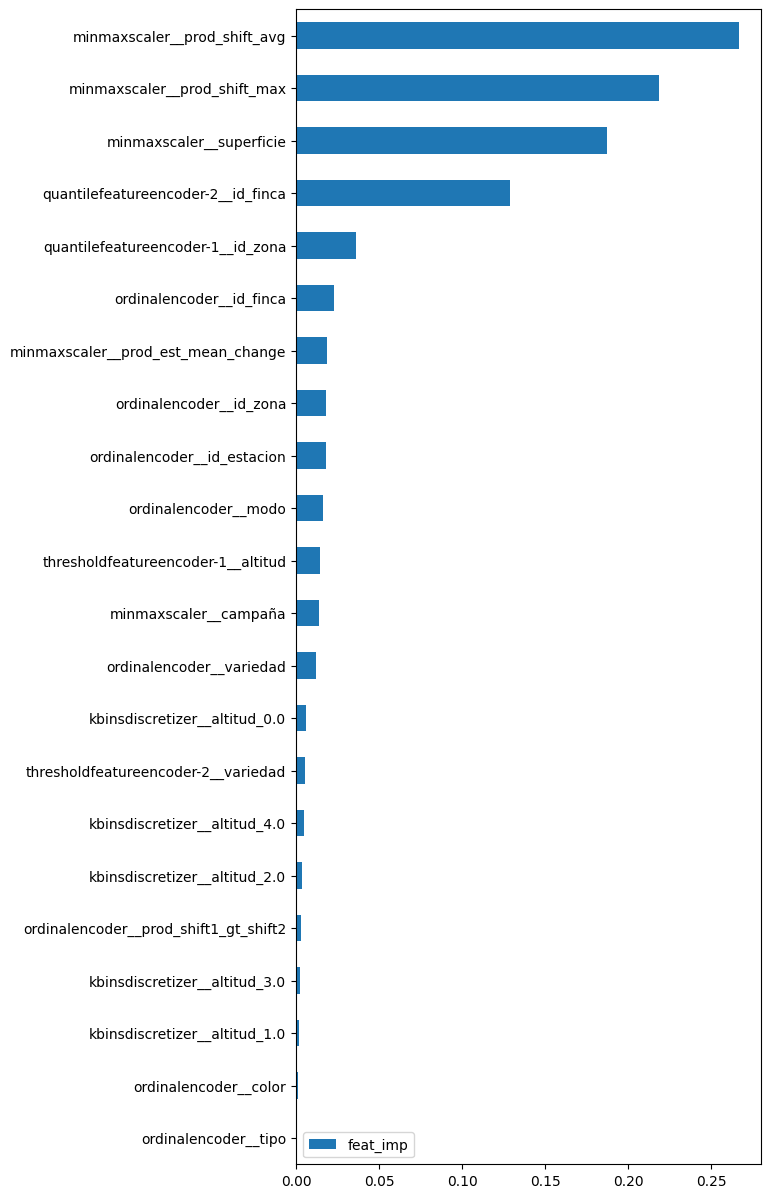

In [73]:
show_feat_imps(
    m[-1].feature_importances_,
    m[:-1].get_feature_names_out(),
)

Shap values

In [74]:
import shap
shap.initjs()

In [75]:
explainer = shap.TreeExplainer(m[-1])

In [77]:
x_sample = X.sample(int(0.8*X.shape[0]))
x_sample_trans = pd.DataFrame(
    m[:-1].transform(x_sample),
    columns=m[:-1].get_feature_names_out(),
)

In [78]:
shap_values = explainer.shap_values(x_sample_trans)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


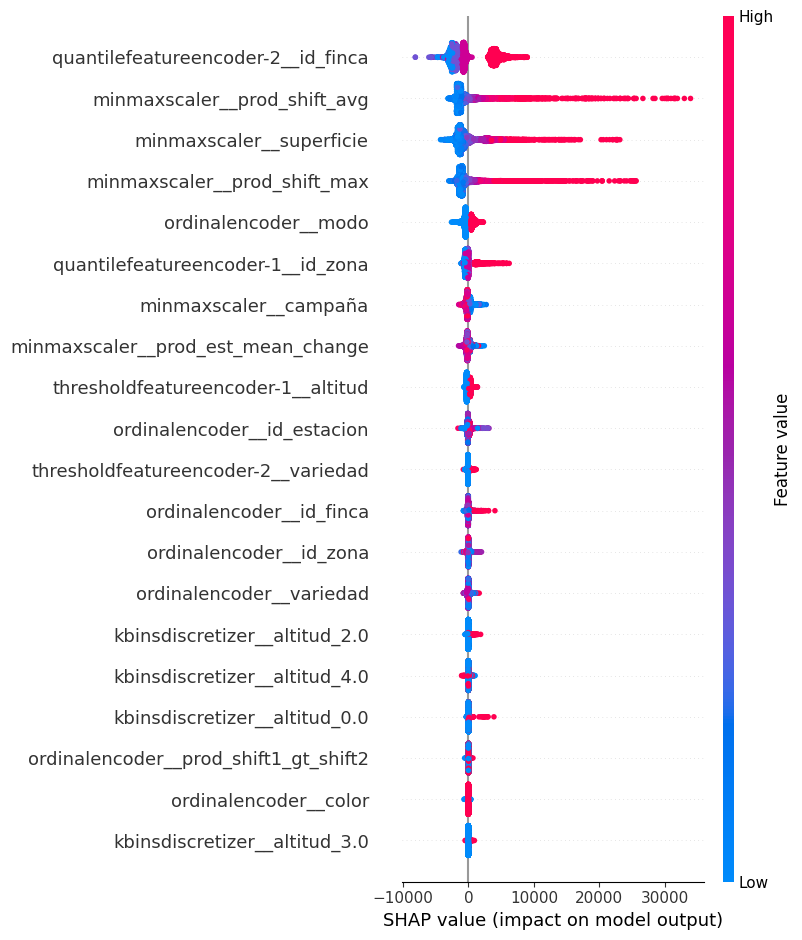

In [79]:
shap.summary_plot(shap_values, x_sample_trans)

# 7. Prediccion Final

In [80]:
primer_entrega = pd.read_csv('../data/final/UH2023_Universidad Complutense de Madrid (UCM)_Malbecs_1.txt', sep="|", header=None)

In [81]:
y_pred_final = m.predict(X_final)
preds_final = data_final[['id_finca', 'variedad','modo','tipo','color','superficie']].copy()
preds_final['produccion'] = y_pred_final
preds_final = preds_final.sort_values(['id_finca', 'variedad','modo','tipo','color','superficie'], ascending=True)

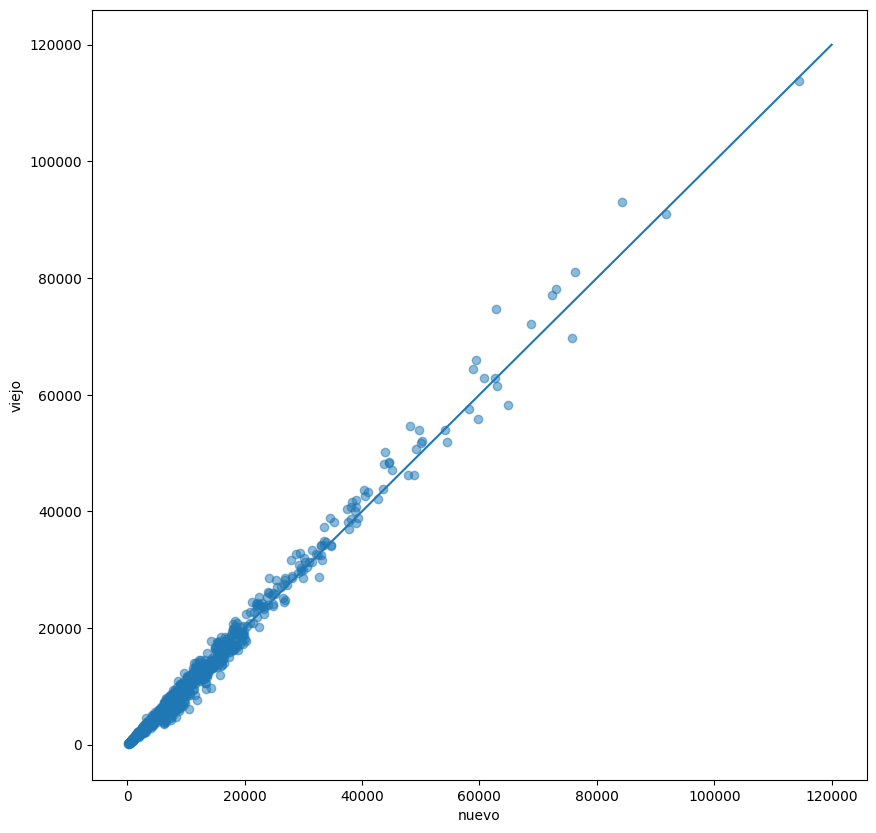

In [82]:
plt.figure(figsize=(10, 10))
plt.scatter(x=preds_final.iloc[:,-1],
            y=primer_entrega.iloc[:, -1], alpha=0.5)
plt.plot([0, 120000], [0, 120000])
plt.xlabel('nuevo')
plt.ylabel('viejo')
plt.show()


In [83]:
y_pred_final = m.predict(X_final)
preds_final = data_final[['id_finca', 'variedad','modo','tipo','color','superficie']].copy()
preds_final['produccion'] = y_pred_final
preds_final = preds_final.sort_values(['id_finca', 'variedad','modo','tipo','color','superficie'], ascending=True)

In [84]:
preds_final.to_csv('../data/final/UH2023_Universidad Complutense de Madrid (UCM)_Malbecs_final.txt', sep="|", header=None)